# Mu vs Pileups wt Bonsai DTrees
In this notebook, we try to use an ensemble model for classification of Muons vs Ar39 Background.

We consider the following data:
- **Muons**: snapshot of acquisitions from any muon-induced process (*ionization, scattering, etc.*)
- **Ar39**: snapshot of acquisitions from pileups of 1, ..., 5 decays

We further assume to have directly the **features** from acquisitions:
- NPE, Number of Active Slices for each shroud
- Range, Var, Std Dev of active slices
- Total number of PE detected, Total Number of Active Slices from both shrouds

In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
# Load Ar39
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_08_18_2020", "Ar39_Snapshots")

fileprefix = "Snapshot1Ar39*"
dfall1ar39 = load_dataframe_from_files(dirin, fileprefix)

fileprefix = "Snapshot2Ar39*"
dfall2ar39 = load_dataframe_from_files(dirin, fileprefix)

fileprefix = "Snapshot3Ar39*"
dfall3ar39 = load_dataframe_from_files(dirin, fileprefix)

fileprefix = "Snapshot4Ar39*"
dfall4ar39 = load_dataframe_from_files(dirin, fileprefix)

fileprefix = "Snapshot5Ar39*"
dfall5ar39 = load_dataframe_from_files(dirin, fileprefix)

print("[Info] Loaded all 1, 2, 3, 4, 5 Ar39 Pileups in {:.2f} seconds".format(time.time() - init))

# Load Muons
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_08_18_2020", "Muons_Snapshots")

fileprefix = "SnapshotMuons*"
dfallmu = load_dataframe_from_files(dirin, fileprefix)
print("[Info] Loaded all Muons in {:.2f} seconds".format(time.time() - init))

[Info] Loading 100 files wt prefix:
Snapshot1Ar39*
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot2Ar39*
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot3Ar39*
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot4Ar39*
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot5Ar39*
...................................................................................................
[Info] Loaded all 1, 2, 3, 4, 5 Ar39 Pileups in 195.59 seconds
[Info] Loading 100 files wt prefix:
SnapshotMuons*
...................................................................................................
[Info] Loaded all Muons in 2.36

# preliminary cut: Nr Active Slices on Outer Shroud

In [4]:
def nr_active_slices(row):
    return np.nonzero(row.to_numpy())[0].shape[0]
n_inner_slices, n_outer_slices = 12, 20
cut_out_nas = 4

init = time.time()

# store original nr events
original_len_1ar39 = len(dfall1ar39)
original_len_2ar39 = len(dfall2ar39)
original_len_3ar39 = len(dfall3ar39)
original_len_4ar39 = len(dfall4ar39)
original_len_5ar39 = len(dfall5ar39)
original_len_mu = len(dfallmu)

print("[Preliminary Cut on Nr Active Slices of outer shroud]")
dfall1ar39["NActiveSlices_outer"] = dfall1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall1ar39 = dfall1ar39[dfall1ar39.NActiveSlices_outer >= cut_out_nas]

dfall2ar39["NActiveSlices_outer"] = dfall2ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall2ar39 = dfall2ar39[dfall2ar39.NActiveSlices_outer >= cut_out_nas]

dfall3ar39["NActiveSlices_outer"] = dfall3ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall3ar39 = dfall3ar39[dfall3ar39.NActiveSlices_outer >= cut_out_nas]

dfall4ar39["NActiveSlices_outer"] = dfall4ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall4ar39 = dfall4ar39[dfall4ar39.NActiveSlices_outer >= cut_out_nas]

dfall5ar39["NActiveSlices_outer"] = dfall5ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall5ar39 = dfall5ar39[dfall5ar39.NActiveSlices_outer >= cut_out_nas]

dfallmu["NActiveSlices_outer"] = dfallmu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfallmu = dfallmu[dfallmu.NActiveSlices_outer >= cut_out_nas]

print("[Muons] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfallmu), len(dfallmu)/original_len_mu*100))
print("[1Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfall1ar39), len(dfall1ar39)/original_len_1ar39*100))
print("[2Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfall2ar39), len(dfall2ar39)/original_len_2ar39*100))
print("[3Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfall3ar39), len(dfall3ar39)/original_len_3ar39*100))
print("[4Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfall4ar39), len(dfall4ar39)/original_len_4ar39*100))
print("[5Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfall4ar39), len(dfall5ar39)/original_len_5ar39*100))
print()
print("[Info] Cut performed in {:.3f} seconds".format(time.time() - init))

[Preliminary Cut on Nr Active Slices of outer shroud]
[Muons] Select >= 4 Outer NAS: 132050 (84.08%)
[1Ar39] Select >= 4 Outer NAS: 121738 (2.30%)
[2Ar39] Select >= 4 Outer NAS: 482387 (18.19%)
[3Ar39] Select >= 4 Outer NAS: 920580 (52.07%)
[4Ar39] Select >= 4 Outer NAS: 1097976 (82.81%)
[5Ar39] Select >= 4 Outer NAS: 1097976 (95.19%)

[Info] Cut performed in 143.550 seconds


# dataset composition

In [5]:
dfall5ar39.pedetected.max()

55

In [6]:
max_pe_lowenergy = 60
tot=len(dfallmu)
tot_lemu=len(dfallmu[dfallmu.pedetected<=max_pe_lowenergy])
print("[Info] Considering {} Muons wt >= {} Outer Active Slices".format(tot, cut_out_nas))
print("[Info] Select {} Muons wt <= {} PE Detected".format(tot_lemu, max_pe_lowenergy))

[Info] Considering 132050 Muons wt >= 4 Outer Active Slices
[Info] Select 23334 Muons wt <= 60 PE Detected


In [7]:
# parameters
#ww = (ar39_weights * ar39_fprs) / (ar39_weights * ar39_fprs).sum()
fract_1ar39 = .50
ww = [fract_1ar39, 
      (1-fract_1ar39) * fract_1ar39, 
      (1-fract_1ar39)**2 * fract_1ar39, 
      (1-fract_1ar39)**3 * fract_1ar39, 
      (1-fract_1ar39)**4]
      
test = 3334    # to round the mu training data to 20K
# compute ar39 dataset size
print("[Muons Dataset]")
print("\tInstances Test Muons: {}".format(test))
print("\tInstances Training Muons: {}".format(tot_lemu-test))

print("[Ar39 Dataset]")
print("\tInstances Test Ar39: all the rest")
ar39_dataset_sizes = []
for i in range(5):
    current = (tot_lemu-test) * ww[i]
    print("\tInstances Training {} Ar39: {:.0f}".format(i+1, round(current)))
    ar39_dataset_sizes.append(round(current))

[Muons Dataset]
	Instances Test Muons: 3334
	Instances Training Muons: 20000
[Ar39 Dataset]
	Instances Test Ar39: all the rest
	Instances Training 1 Ar39: 10000
	Instances Training 2 Ar39: 5000
	Instances Training 3 Ar39: 2500
	Instances Training 4 Ar39: 1250
	Instances Training 5 Ar39: 1250


# remove test data

In [8]:
# Remove test data for later eval
n_test_mu, n_test_ar = test, 100000
# split mu data
dflemu = dfallmu[dfallmu.pedetected<=max_pe_lowenergy]
id_mu = np.arange(len(dflemu))
np.random.shuffle(id_mu)
test_muons, train_muons = dflemu.iloc[id_mu[:n_test_mu], :], dflemu.iloc[id_mu[n_test_mu:], :]

# split ar39 data
id_ar = np.arange(len(dfall1ar39))
np.random.shuffle(id_ar)
test_1ar39, train_1ar39 = dfall1ar39.iloc[id_ar[:n_test_ar], :], dfall1ar39.iloc[id_ar[n_test_ar:], :]

id_ar = np.arange(len(dfall2ar39))
np.random.shuffle(id_ar)
test_2ar39, train_2ar39 = dfall2ar39.iloc[id_ar[:n_test_ar], :], dfall2ar39.iloc[id_ar[n_test_ar:], :]

id_ar = np.arange(len(dfall3ar39))
np.random.shuffle(id_ar)
test_3ar39, train_3ar39 = dfall3ar39.iloc[id_ar[:n_test_ar], :], dfall3ar39.iloc[id_ar[n_test_ar:], :]

id_ar = np.arange(len(dfall4ar39))
np.random.shuffle(id_ar)
test_4ar39, train_4ar39 = dfall4ar39.iloc[id_ar[:n_test_ar], :], dfall4ar39.iloc[id_ar[n_test_ar:], :]

id_ar = np.arange(len(dfall5ar39))
np.random.shuffle(id_ar)
test_5ar39, train_5ar39 = dfall5ar39.iloc[id_ar[:n_test_ar], :], dfall5ar39.iloc[id_ar[n_test_ar:], :]

print("[Info] Muon Train:\t{},\tTest {}".format(len(train_muons), len(test_muons)))
print("[Info] 1 Ar39 Train:\t{},\tTest {}".format(len(train_1ar39), len(test_1ar39)))
print("[Info] 2 Ar39 Train:\t{},\tTest {}".format(len(train_2ar39), len(test_2ar39)))
print("[Info] 3 Ar39 Train:\t{},\tTest {}".format(len(train_3ar39), len(test_3ar39)))
print("[Info] 4 Ar39 Train:\t{},\tTest {}".format(len(train_4ar39), len(test_4ar39)))
print("[Info] 5 Ar39 Train:\t{},\tTest {}".format(len(train_5ar39), len(test_5ar39)))

test_1ar39["group"] = 1
test_2ar39["group"] = 2
test_3ar39["group"] = 3
test_4ar39["group"] = 4
test_5ar39["group"] = 5
test_ar39 = pd.concat([test_1ar39, test_2ar39, test_3ar39, test_4ar39, test_5ar39], axis=0)

[Info] Muon Train:	20000,	Test 3334
[Info] 1 Ar39 Train:	21738,	Test 100000
[Info] 2 Ar39 Train:	382387,	Test 100000
[Info] 3 Ar39 Train:	820580,	Test 100000
[Info] 4 Ar39 Train:	997976,	Test 100000
[Info] 5 Ar39 Train:	909672,	Test 100000


/home/luigi/Development/ML4NP/env/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/luigi/Development/ML4NP/env/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/luigi/Development/ML4NP/env/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# undersample ar39

In [9]:
def undersample_argon(ar39_df, number_of_instances=1000, augment_from_pe=35, augmentation_nr=5,
                      skip_first_cols=2, nslices=72):
    bins = np.linspace(0, ar39_df.pedetected.max()+1, ar39_df.pedetected.max()+2)
    bin_cont, bin_edges, _ = plt.hist(ar39_df.pedetected, bins=bins, density=True, label="Ar39", edgecolor='w')
    # compute the nr of samples for each PE value,
    # to undersample ar39 keeping the same distribution
    avail_instances_per_pe = np.array([len(ar39_df[ar39_df.pedetected==pe]) for pe in range(0, ar39_df.pedetected.max()+1)])
    nr_ar_samples_per_pe = np.array(np.where(np.ceil(bin_cont*number_of_instances)<=avail_instances_per_pe, np.ceil(bin_cont*number_of_instances), number_of_instances), dtype=int)
    # Introduce a small bias on instances with "high" PE value
    # to avoid to have just a few samples (e.g. 30,40,50,60 PE)
    scaled_ar39 = pd.DataFrame()
    for pe in range(1, ar39_df.pedetected.max()+1):
        if pe > augment_from_pe:
            nr_instances = augmentation_nr
        else:
            nr_instances = nr_ar_samples_per_pe[pe]
        scaled_ar39 = pd.concat([scaled_ar39, ar39_df[ar39_df.pedetected==pe].iloc[:nr_instances]])
    AA = scaled_ar39.iloc[:, skip_first_cols:skip_first_cols+nslices].to_numpy()
    np.random.shuffle(AA)    # to avoid order by PE
    return pd.DataFrame(AA)

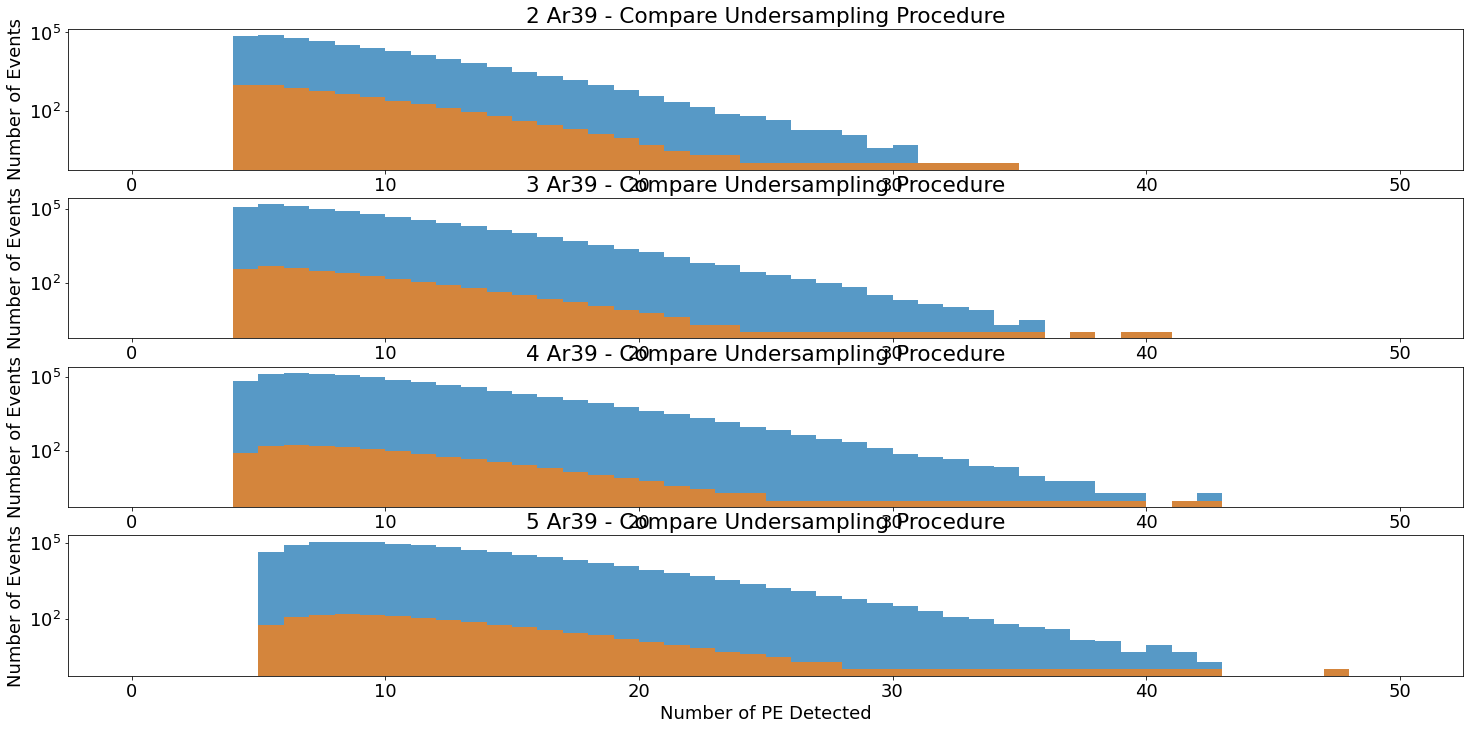

[Info] Undersample 1 Ar39: 10012 instances
[Info] Undersample 2 Ar39: 5018 instances
[Info] Undersample 3 Ar39: 2522 instances
[Info] Undersample 4 Ar39: 1276 instances
[Info] Undersample 5 Ar39: 1275 instances
[Info] Total Ar39 Training data: 20103 instances


In [10]:
skip_first_cols, n_inner_slices, n_outer_slices = 3, 12, 20

sampled_1ar39 = undersample_argon(train_1ar39, ar39_dataset_sizes[0], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)
sampled_2ar39 = undersample_argon(train_2ar39, ar39_dataset_sizes[1], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)
sampled_3ar39 = undersample_argon(train_3ar39, ar39_dataset_sizes[2], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)
sampled_4ar39 = undersample_argon(train_4ar39, ar39_dataset_sizes[3], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)
sampled_5ar39 = undersample_argon(train_5ar39, ar39_dataset_sizes[4], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)

plt.cla()
bins = np.linspace(0, 50, 51)
alpha = 0.75

plt.subplot(4, 1, 1)
plt.title("1 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.hist(train_1ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_1ar39.sum(axis=1), bins=np.linspace(0, 50, 51), label="Undersampled Data", density=False, alpha=alpha)
plt.yscale("log")

plt.subplot(5, 1, 2)
plt.title("2 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.hist(train_2ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_2ar39.sum(axis=1), bins=bins, label="Undersampled Data", density=False, alpha=alpha)

plt.subplot(5, 1, 3)
plt.title("3 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.hist(train_3ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_3ar39.sum(axis=1), bins=bins, label="Undersampled Data", density=False, alpha=alpha)

plt.subplot(5, 1, 4)
plt.title("4 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.hist(train_4ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_4ar39.sum(axis=1), bins=bins, label="Undersampled Data", density=False, alpha=alpha)

plt.subplot(5, 1, 5)
plt.title("5 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.hist(train_5ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_5ar39.sum(axis=1), bins=bins, label="Undersampled Data", density=False, alpha=alpha)

plt.show()

train_15ar39 = pd.concat([sampled_1ar39, sampled_2ar39, sampled_3ar39, sampled_4ar39, sampled_5ar39], axis=0)
print("[Info] Undersample 1 Ar39: {} instances".format(sampled_1ar39.shape[0]))
print("[Info] Undersample 2 Ar39: {} instances".format(sampled_2ar39.shape[0]))
print("[Info] Undersample 3 Ar39: {} instances".format(sampled_3ar39.shape[0]))
print("[Info] Undersample 4 Ar39: {} instances".format(sampled_4ar39.shape[0]))
print("[Info] Undersample 5 Ar39: {} instances".format(sampled_5ar39.shape[0]))
print("[Info] Total Ar39 Training data: {} instances".format(train_15ar39.shape[0]))

# compute features

In [11]:
# Create Features
def pe_detected(row):
    return np.sum(row.to_numpy())

def nr_active_slices(row):
    return np.nonzero(row.to_numpy())[0].shape[0]

def mean_npe(row):
    return np.mean(row.to_numpy())

def mean_npe_active(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return np.mean(rownp[rownonzero]) if rownonzero.shape[0]>0 else -1

def std_npe(row):
    return np.std(row.to_numpy())

def std_npe_active(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return np.std(rownp[rownonzero]) if rownonzero.shape[0]>0 else -1

def range_detections(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return rownonzero[-1] - rownonzero[0] + 1 if rownonzero.shape[0]>0 else -1

def spatial_var(row):
    rownp = row.to_numpy()
    ids = np.repeat(np.argwhere(rownp>0), rownp[rownp>0])
    return np.var(ids) if ids.shape[0]>0 else -1

def spatial_std(row):
    rownp = row.to_numpy()
    ids = np.repeat(np.argwhere(rownp>0), rownp[rownp>0])
    return np.std(ids) if ids.shape[0]>0 else -1

In [12]:
# Compute features muon
import time

init = time.time()
df_mu_feat = pd.DataFrame()
df_mu_feat["PEDetected_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_mu_feat["NActiveSlices_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_mu_feat["MeanNPEActive_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_mu_feat["StdNPEActive_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
df_mu_feat["SpatialRange_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
df_mu_feat["SpatialVar_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
df_mu_feat["SpatialStd_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Inner features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_mu_feat["PEDetected_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_mu_feat["NActiveSlices_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_mu_feat["MeanNPEActive_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_mu_feat["StdNPEActive_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
df_mu_feat["SpatialRange_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
df_mu_feat["SpatialVar_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
df_mu_feat["SpatialStd_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Outer features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_mu_feat["PEDetected_tot"] = df_mu_feat["PEDetected_inner"] + df_mu_feat["PEDetected_outer"]
df_mu_feat["NActiveSlices_tot"] = df_mu_feat["NActiveSlices_inner"] + df_mu_feat["NActiveSlices_outer"]
df_mu_feat["MeanNPEActive_tot"] = df_mu_feat["PEDetected_tot"] / df_mu_feat["NActiveSlices_tot"]
df_mu_feat = df_mu_feat.fillna(-1)
print("Compute combined features: {:.3f} sec".format(time.time() - init))

init = time.time()
df_ar39_feat = pd.DataFrame()
df_ar39_feat["PEDetected_inner"] = train_15ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_ar39_feat["NActiveSlices_inner"] = train_15ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_ar39_feat["MeanNPEActive_inner"] = train_15ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_ar39_feat["StdNPEActive_inner"] = train_15ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
df_ar39_feat["SpatialRange_inner"] = train_15ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
df_ar39_feat["SpatialVar_inner"] = train_15ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
df_ar39_feat["SpatialStd_inner"] = train_15ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar39 Inner features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_ar39_feat["PEDetected_outer"] = train_15ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_ar39_feat["NActiveSlices_outer"] = train_15ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_ar39_feat["MeanNPEActive_outer"] = train_15ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_ar39_feat["StdNPEActive_outer"] = train_15ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
df_ar39_feat["SpatialRange_outer"] = train_15ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
df_ar39_feat["SpatialVar_outer"] = train_15ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
df_ar39_feat["SpatialStd_outer"] = train_15ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar39 Outer features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_ar39_feat["PEDetected_tot"] = df_ar39_feat["PEDetected_inner"] + df_ar39_feat["PEDetected_outer"]
df_ar39_feat["NActiveSlices_tot"] = df_ar39_feat["NActiveSlices_inner"] + df_ar39_feat["NActiveSlices_outer"]
df_ar39_feat["MeanNPEActive_tot"] = df_ar39_feat["PEDetected_tot"] / df_ar39_feat["NActiveSlices_tot"]
df_ar39_feat = df_ar39_feat.fillna(-1)
print("Compute combined features: {:.3f} sec".format(time.time() - init))

Compute Mu Inner features: 3.004 sec
Compute Mu Outer features: 4.439 sec
Compute combined features: 0.004 sec
Compute Ar39 Inner features: 3.919 sec
Compute Ar39 Outer features: 4.853 sec
Compute combined features: 0.005 sec


# feature selection

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Prepare data for training
df_mu_feat["y"] = 1
df_ar39_feat["y"] = 0
data = pd.concat([df_mu_feat, df_ar39_feat], axis=0)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X = np.array(X)
y = np.array(y)

In [14]:
# Train final model
final_clf = DecisionTreeClassifier()
final_clf.fit(X, y)

full_feature_names = df_ar39_feat.columns[:-1]
short_feature_names = full_feature_names
# get importance
importances = final_clf.feature_importances_

# summarize feature importance
for imp_id in np.argsort(importances)[::-1]:
    if(importances[imp_id]<=0): 
        continue
    print('Feature: %s =>\tScore: %.5f' % (short_feature_names[imp_id], importances[imp_id]))

Feature: PEDetected_outer =>	Score: 0.56642
Feature: SpatialStd_inner =>	Score: 0.14828
Feature: SpatialRange_outer =>	Score: 0.06926
Feature: SpatialStd_outer =>	Score: 0.05592
Feature: PEDetected_tot =>	Score: 0.04992
Feature: SpatialVar_outer =>	Score: 0.03287
Feature: SpatialVar_inner =>	Score: 0.02853
Feature: StdNPEActive_outer =>	Score: 0.01557
Feature: PEDetected_inner =>	Score: 0.00798
Feature: MeanNPEActive_tot =>	Score: 0.00697
Feature: MeanNPEActive_outer =>	Score: 0.00454
Feature: NActiveSlices_tot =>	Score: 0.00409
Feature: StdNPEActive_inner =>	Score: 0.00255
Feature: NActiveSlices_outer =>	Score: 0.00229
Feature: SpatialRange_inner =>	Score: 0.00195
Feature: MeanNPEActive_inner =>	Score: 0.00160
Feature: NActiveSlices_inner =>	Score: 0.00124


In [15]:
my_features = ["PEDetected_outer", "NActiveSlices_outer", "MeanNPEActive_outer", "SpatialVar_outer", "SpatialRange_outer", 
               "PEDetected_inner", "NActiveSlices_inner", "MeanNPEActive_inner", "SpatialVar_inner", "SpatialRange_inner",
               "PEDetected_tot", "NActiveSlices_tot", "MeanNPEActive_tot"]

# train bonsai decision treees

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix as cv

In [104]:
init = time.time()

# Prepare data for training
df_mu_feat["y"] = 1
df_ar39_feat["y"] = 0
data = pd.concat([df_mu_feat, df_ar39_feat], axis=0)
X, y = data.loc[:, my_features], data.iloc[:, -1]
X = np.array(X)
y = np.array(y)

In [44]:
rf_random_grid = {'n_estimators': range(10, 30),
                  'max_features': ['auto', 'sqrt'],
                  'max_depth': range(1, 6),
                  'min_samples_split': range(2, 501),
                  'min_samples_leaf':  range(100, 1000),
                  'bootstrap': [True, False]
                 }

score = "precision"
n_rnd_iters = 1000
print("[Info] Randomized Search")

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_random_grid, 
                               n_iter=n_rnd_iters, cv=5, n_jobs=-1, verbose=2)
# random search
init = time.time()
rf_random.fit(X, y)
print("[Time] Random Search: {} iterations, time {:.3f}".format(n_rnd_iters, time.time() - init))
print("[Results]")
print(rf_random.best_params_)
print(rf_random.best_score_)

[Info] Randomized Search
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  9.4min finished


[Time] Random Search: 1000 iterations, time 563.786
[Results]
{'n_estimators': 11, 'min_samples_split': 40, 'min_samples_leaf': 106, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': False}
0.9012285642955321


# fine tune wt grid-search

In [47]:
init = time.time()

rf_random_grid = {'n_estimators': range(10, 16),
                  'max_features': ['auto'],
                  'max_depth': range(3, 6),
                  'min_samples_split': range(50, 201, 25),
                  'min_samples_leaf':  range(100, 151, 10),
                  'bootstrap': [True, False]
                 }

score = "precision"
n_rnd_iters = 1000
print("[Info] Grid Search")

rf = RandomForestClassifier()
rf_random = GridSearchCV(estimator=rf, param_grid=rf_random_grid, 
                         cv=5, n_jobs=-1, verbose=2)
# random search
init = time.time()
rf_random.fit(X, y)
print("[Time] Grid Search: {} iterations, time {:.3f}".format(n_rnd_iters, time.time() - init))
print("[Results]")
print(rf_random.best_params_)
print(rf_random.best_score_)

[Info] Grid Search
Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 7560 out of 7560 | elapsed: 11.4min finished


[Time] Grid Search: 1000 iterations, time 685.873
[Results]
{'bootstrap': False, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 10}
0.9044954593941525


# train final model

In [105]:
final_clf = RandomForestClassifier(n_estimators=10,
                                   max_depth=5,
                                   max_features='auto',
                                   min_samples_split=100,
                                   min_samples_leaf=100,
                                   bootstrap=False)
final_clf.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=10)

In [106]:
from joblib import dump

dump(final_clf, "rf_10est_5depth.joblib")

['rf_10est_5depth.joblib']

In [22]:
import tensorflow as tf

cnn = tf.keras.models.load_model(os.path.join("..", "mu_vs_pileups", "models", "model_20200911-111046", "model.oncerepeat1.epoch02-valacc0.91889"))

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 27, 64)            448       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            6176      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 32)             3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

# test cnn on unseen data

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as cv

In [71]:
mu_raw_test = test_muons
ar39_raw_test = test_ar39
mu_raw_test["y"] = 1
mu_raw_test["group"] = 0
ar39_raw_test["y"] = 0

raw_test_data = pd.concat([mu_raw_test, ar39_raw_test], axis=0)
X, y = raw_test_data.iloc[:, 3:3+n_inner_slices+n_outer_slices], raw_test_data.iloc[:, -2]
X = np.array(X)
y = np.array(y)

/home/luigi/Development/ML4NP/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luigi/Development/ML4NP/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [72]:
X = tf.expand_dims(X, axis=-1)

In [66]:
init = time.time()
cnn_y_pred_proba = cnn.predict_proba(X)
cnn_y_pred = tf.where(cnn_y_pred_proba>.50, 1, 0)
print("[Info] CNN Predict in {:.3f} seconds".format(time.time() - init))

[Info] CNN Predict in 16.604 seconds


In [75]:
accuracy = accuracy_score(y, cnn_y_pred)
precision = precision_score(y, cnn_y_pred)
recall = recall_score(y, cnn_y_pred)
f1 = f1_score(y, cnn_y_pred)
my_s = accuracy_score(y, cnn_y_pred)
tn, fp, fn, tp = cv(y, cnn_y_pred).ravel()
tpr, fpr = recall*100, fp/(fp+tn)*100

result_template  = "[Result] {}:\nAccuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}, My Score: {:.3f}\n"
cm_template  =     "[Result] Conf. Matrix: TN: {}, FP: {}, FN: {}, TP: {} | TPR: {:.2f}%, FPR: {:.2f}%\n"


print(result_template.format("Test({} Mu, {} Ar)".format(len(mu_test_feat), len(ar_test_feat)),
                             accuracy, precision, recall, f1, my_s))    
print(cm_template.format(tn, fp, fn, tp, tpr, fpr))    

[Result] Test(3334 Mu, 500000 Ar):
Accuracy: 0.649, Precision: 0.018, Recall: 0.968, F1: 0.035, My Score: 0.649

[Result] Conf. Matrix: TN: 323608, FP: 176392, FN: 106, TP: 3228 | TPR: 96.82%, FPR: 35.28%



In [76]:
raw_test_data["cnn_y_pred"] = cnn_y_pred_proba

# test model on unseen data

In [19]:
# Prepare data
init = time.time()

init = time.time()
mu_test_feat = pd.DataFrame()
mu_test_feat["PEDetected_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
mu_test_feat["NActiveSlices_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
mu_test_feat["MeanNPEActive_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
mu_test_feat["StdNPEActive_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
mu_test_feat["SpatialRange_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
mu_test_feat["SpatialVar_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
mu_test_feat["SpatialStd_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Inner features: {:.3f} sec".format(time.time() - init))
init = time.time()
mu_test_feat["PEDetected_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
mu_test_feat["NActiveSlices_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
mu_test_feat["MeanNPEActive_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
mu_test_feat["StdNPEActive_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
mu_test_feat["SpatialRange_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
mu_test_feat["SpatialVar_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
mu_test_feat["SpatialStd_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Inner features: {:.3f} sec".format(time.time() - init))
mu_test_feat["PEDetected_tot"] = mu_test_feat["PEDetected_inner"] + mu_test_feat["PEDetected_outer"]
mu_test_feat["NActiveSlices_tot"] = mu_test_feat["NActiveSlices_inner"] + mu_test_feat["NActiveSlices_outer"]
mu_test_feat["MeanNPEActive_tot"] = mu_test_feat["PEDetected_tot"] / mu_test_feat["NActiveSlices_tot"]
mu_test_feat = mu_test_feat.fillna(-1)
print("Compute Mu Combined features: {:.3f} sec".format(time.time() - init))

init = time.time()
ar_test_feat = pd.DataFrame()
ar_test_feat["PEDetected_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
ar_test_feat["NActiveSlices_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
ar_test_feat["MeanNPEActive_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
ar_test_feat["StdNPEActive_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
ar_test_feat["SpatialRange_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
ar_test_feat["SpatialVar_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
ar_test_feat["SpatialStd_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar features: {:.3f} sec".format(time.time() - init))
init = time.time()
ar_test_feat["PEDetected_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
ar_test_feat["NActiveSlices_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
ar_test_feat["MeanNPEActive_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
ar_test_feat["StdNPEActive_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
ar_test_feat["SpatialRange_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
ar_test_feat["SpatialVar_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
ar_test_feat["SpatialStd_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar features: {:.3f} sec".format(time.time() - init))
ar_test_feat["PEDetected_tot"] = ar_test_feat["PEDetected_inner"] + ar_test_feat["PEDetected_outer"]
ar_test_feat["NActiveSlices_tot"] = ar_test_feat["NActiveSlices_inner"] + ar_test_feat["NActiveSlices_outer"]
ar_test_feat["MeanNPEActive_tot"] = ar_test_feat["PEDetected_tot"] / ar_test_feat["NActiveSlices_tot"]
ar_test_feat = ar_test_feat.fillna(-1)
ar_test_feat["group"] = test_ar39["group"]
print("Compute Ar Combined features: {:.3f} sec".format(time.time() - init))

Compute Mu Inner features: 0.558 sec
Compute Mu Inner features: 0.795 sec
Compute Mu Combined features: 0.798 sec
Compute Ar features: 88.225 sec
Compute Ar features: 112.593 sec
Compute Ar Combined features: 112.627 sec


In [107]:
# Test model
init = time.time()

mu_test_feat["y"] = 1
mu_test_feat["group"] = 0    # used only in ar39 to distinguish the subclasses
ar_test_feat["y"] = 0

test_data = pd.concat([mu_test_feat, ar_test_feat], axis=0)
X, y = test_data.loc[:, my_features], test_data.iloc[:, -2]
X = np.array(X)
y = np.array(y)

init = time.time()
y_pred = final_clf.predict(X)
y_pred_proba = final_clf.predict_proba(X)
print("[Info] RForest predict in {:.3f} seconds".format(time.time() - init))

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
my_s = accuracy_score(y, y_pred)
tn, fp, fn, tp = cv(y, y_pred).ravel()
tpr, fpr = recall*100, fp/(fp+tn)*100

result_template  = "[Result] {}:\nAccuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}, My Score: {:.3f}\n"
cm_template  =     "[Result] Conf. Matrix: TN: {}, FP: {}, FN: {}, TP: {} | TPR: {:.2f}%, FPR: {:.2f}%\n"


print(result_template.format("Test({} Mu, {} Ar)".format(len(mu_test_feat), len(ar_test_feat)),
                             accuracy, precision, recall, f1, my_s))    
print(cm_template.format(tn, fp, fn, tp, tpr, fpr))    

[Info] RForest predict in 0.559 seconds
[Result] Test(3334 Mu, 500000 Ar):
Accuracy: 0.701, Precision: 0.019, Recall: 0.892, F1: 0.038, My Score: 0.701

[Result] Conf. Matrix: TN: 349756, FP: 150244, FN: 361, TP: 2973 | TPR: 89.17%, FPR: 30.05%



In [108]:
test_data["y_pred"] = y_pred
test_data["y_pred_proba"] = y_pred_proba[:, 1]

# estimate overall efficiency (considering cut NAS outer, cut 60 PE, RF tpr)

In [141]:
testset_tpr_rf = len(test_data[(test_data.y==1) & (test_data.y_pred==1)]) / len(test_data[test_data.y==1])
testset_tpr_cnn = len(raw_test_data[(raw_test_data.y==1) & (raw_test_data.cnn_y_pred>.50)]) / len(raw_test_data[raw_test_data.y>.5])

rf_tpr = len(dfallmu[dfallmu.pedetected>max_pe_lowenergy]) / len(dfallmu) + \
        len(dfallmu[dfallmu.pedetected<=max_pe_lowenergy]) / len(dfallmu) * testset_tpr_rf
cnn_tpr = len(dfallmu[dfallmu.pedetected>max_pe_lowenergy]) / len(dfallmu) + \
        len(dfallmu[dfallmu.pedetected<=max_pe_lowenergy]) / len(dfallmu) * testset_tpr_cnn

In [86]:
cut_tpr = len(dfallmu) / original_len_mu
print("[Info] TPR Cut Out NAS + Dtree: {:.5f}".format(cut_tpr * rf_tpr))

[Info] TPR Cut Out NAS + Dtree: 0.82367


# estimate overall FPR (considering cut NAS + RF tnr)

In [87]:
rf_fpr1 = len(test_data[(test_data.y==0) & (test_data.group==1) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==1)])
rf_fpr2 = len(test_data[(test_data.y==0) & (test_data.group==2) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==2)])
rf_fpr3 = len(test_data[(test_data.y==0) & (test_data.group==3) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==3)])
rf_fpr4 = len(test_data[(test_data.y==0) & (test_data.group==4) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==4)])
rf_fpr5 = len(test_data[(test_data.y==0) & (test_data.group==5) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==5)])
ar39_dtree_fprs = [rf_fpr1, rf_fpr2, rf_fpr3, rf_fpr4, rf_fpr5]
ar39_dtree_fprs

[0.1813, 0.24757, 0.29246, 0.3635, 0.45465]

In [113]:
cnn_fpr1 = len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==1) & (raw_test_data.cnn_y_pred>.5)]) / len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==1)])
cnn_fpr2 = len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==2) & (raw_test_data.cnn_y_pred>.5)]) / len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==2)])
cnn_fpr3 = len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==3) & (raw_test_data.cnn_y_pred>.5)]) / len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==3)])
cnn_fpr4 = len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==4) & (raw_test_data.cnn_y_pred>.5)]) / len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==4)])
cnn_fpr5 = len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==5) & (raw_test_data.cnn_y_pred>.5)]) / len(raw_test_data[(raw_test_data.y==0) & (raw_test_data.group==5)])
ar39_cnn_fprs = [cnn_fpr1, cnn_fpr2, cnn_fpr3, cnn_fpr4, cnn_fpr5]
ar39_cnn_fprs

[0.53669, 0.4344, 0.32706, 0.2512, 0.21457]

In [112]:
raw_test_data.group.describe()

count    503334.000000
mean          2.980129
std           1.430376
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: group, dtype: float64

In [125]:
cut_1ar39_fpr = len(dfall1ar39) / original_len_1ar39
print("[Info] Estimate overall TNR 1 Ar39:\n" \
      "\tCut NAS: reject {:.5} %,\n" \
      "\tRndForest: reject {:.5} %\n" \
      "\tCNN: reject {:.5} %\n" \
      "\tCombined Cut+RF {:.5} %\n" \
      "\tCombined Cut+CNN {:.5} %\n".format(1 - cut_1ar39_fpr, 
                                  1 - rf_fpr1,
                                  1 - cnn_fpr1,
                                  (1-cut_1ar39_fpr) + cut_1ar39_fpr*(1-rf_fpr1), 
                                  (1-cut_1ar39_fpr) + cut_1ar39_fpr*(1-cnn_fpr1)))

cut_2ar39_fpr = len(dfall2ar39) / original_len_2ar39
print("[Info] Estimate overall TNR 2 Ar39:\n" \
      "\tCut NAS: reject {:.5} %,\n" \
      "\tRndForest: reject {:.5} %\n" \
      "\tCNN: reject {:.5} %\n" \
      "\tCombined Cut+RF {:.5} %\n" \
      "\tCombined Cut+CNN {:.5} %\n".format(1 - cut_2ar39_fpr, 
                                  1 - rf_fpr2,
                                  1 - cnn_fpr2,
                                  (1-cut_2ar39_fpr) + cut_2ar39_fpr*(1-rf_fpr2),
                                  (1-cut_2ar39_fpr) + cut_2ar39_fpr*(1-cnn_fpr2)))

cut_3ar39_fpr = len(dfall3ar39) / original_len_3ar39
print("[Info] Estimate overall TNR 3 Ar39:\n" \
      "\tCut NAS: reject {:.5} %,\n" \
      "\tRndForest: reject {:.5} %\n" \
      "\tCNN: reject {:.5} %\n" \
      "\tCombined Cut+RF {:.5} %\n" \
      "\tCombined Cut+CNN {:.5} %\n".format(1 - cut_3ar39_fpr, 
                                  1 - rf_fpr3,
                                  1 - cnn_fpr3,
                                  (1-cut_3ar39_fpr) + cut_3ar39_fpr*(1-rf_fpr3),
                                  (1-cut_3ar39_fpr) + cut_3ar39_fpr*(1-cnn_fpr3)))

cut_4ar39_fpr = len(dfall4ar39) / original_len_4ar39
print("[Info] Estimate overall TNR 4 Ar39:\n" \
      "\tCut NAS: reject {:.5} %,\n" \
      "\tRndForest: reject {:.5} %\n" \
      "\tCNN: reject {:.5} %\n" \
      "\tCombined Cut+RF {:.5} %\n" \
      "\tCombined Cut+CNN {:.5} %\n".format(1 - cut_4ar39_fpr, 
                                  1 - rf_fpr4,
                                  1 - cnn_fpr4,
                                  (1-cut_4ar39_fpr) + cut_4ar39_fpr*(1-rf_fpr4),
                                  (1-cut_4ar39_fpr) + cut_4ar39_fpr*(1-cnn_fpr4)))

cut_5ar39_fpr = len(dfall5ar39) / original_len_5ar39
print("[Info] Estimate overall TNR 5 Ar39:\n" \
      "\tCut NAS: reject {:.5} %,\n" \
      "\tRndForest: reject {:.5} %\n" \
      "\tCNN: reject {:.5} %\n" \
      "\tCombined Cut+RF {:.5} %\n" \
      "\tCombined Cut+CNN {:.5} %\n".format(1 - cut_5ar39_fpr, 
                                  1 - rf_fpr5,
                                  1 - cnn_fpr5,
                                  (1-cut_5ar39_fpr) + cut_5ar39_fpr*(1-rf_fpr5),
                                  (1-cut_5ar39_fpr) + cut_5ar39_fpr*(1-cnn_fpr5)))

[Info] Estimate overall TNR 1 Ar39:
	Cut NAS: reject 0.97705 %,
	RndForest: reject 0.8187 %
	CNN: reject 0.46331 %
	Combined Cut+RF 0.99584 %
	Combined Cut+CNN 0.98768 %

[Info] Estimate overall TNR 2 Ar39:
	Cut NAS: reject 0.81809 %,
	RndForest: reject 0.75243 %
	CNN: reject 0.5656 %
	Combined Cut+RF 0.95496 %
	Combined Cut+CNN 0.92098 %

[Info] Estimate overall TNR 3 Ar39:
	Cut NAS: reject 0.47925 %,
	RndForest: reject 0.70754 %
	CNN: reject 0.67294 %
	Combined Cut+RF 0.8477 %
	Combined Cut+CNN 0.82968 %

[Info] Estimate overall TNR 4 Ar39:
	Cut NAS: reject 0.17186 %,
	RndForest: reject 0.6365 %
	CNN: reject 0.7488 %
	Combined Cut+RF 0.69897 %
	Combined Cut+CNN 0.79197 %

[Info] Estimate overall TNR 5 Ar39:
	Cut NAS: reject 0.048076 %,
	RndForest: reject 0.54535 %
	CNN: reject 0.78543 %
	Combined Cut+RF 0.56721 %
	Combined Cut+CNN 0.79575 %



In [143]:
cut_mu_tpr = len(dfallmu) / original_len_mu
print("[Info] Estimate overall TPR Muons:\n" \
      "\tCut NAS: detect {:.5} %,\n" \
      "\tRndForest: detect {:.5} %\n" \
      "\tCNN: detect {:.5} %\n" \
      "\tCombined Cut+RF {:.5} %\n" \
      "\tCombined Cut+CNN {:.5} %\n".format(cut_mu_tpr, 
                                  rf_tpr,
                                  cnn_tpr,
                                  cut_mu_tpr + (1-cut_mu_tpr)*(rf_tpr),
                                  cut_mu_tpr + (1-cut_mu_tpr)*(cnn_tpr)))

[Info] Estimate overall TPR Muons:
	Cut NAS: detect 0.84078 %,
	RndForest: detect 0.98087 %
	CNN: detect 0.99438 %
	Combined Cut+RF 0.99695 %
	Combined Cut+CNN 0.99911 %



In [128]:
rf_tpr

array([0.        , 0.0194961 , 0.02639472, ..., 0.99910018, 0.99970006,
       1.        ])

# comparison CNN vs RForest

In [92]:
# without combination preliminary cut
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_data.y, test_data.y_pred_proba)
cnn_fpr, cnn_tpr, cnn_thresholds = roc_curve(raw_test_data.y, raw_test_data.cnn_y_pred)

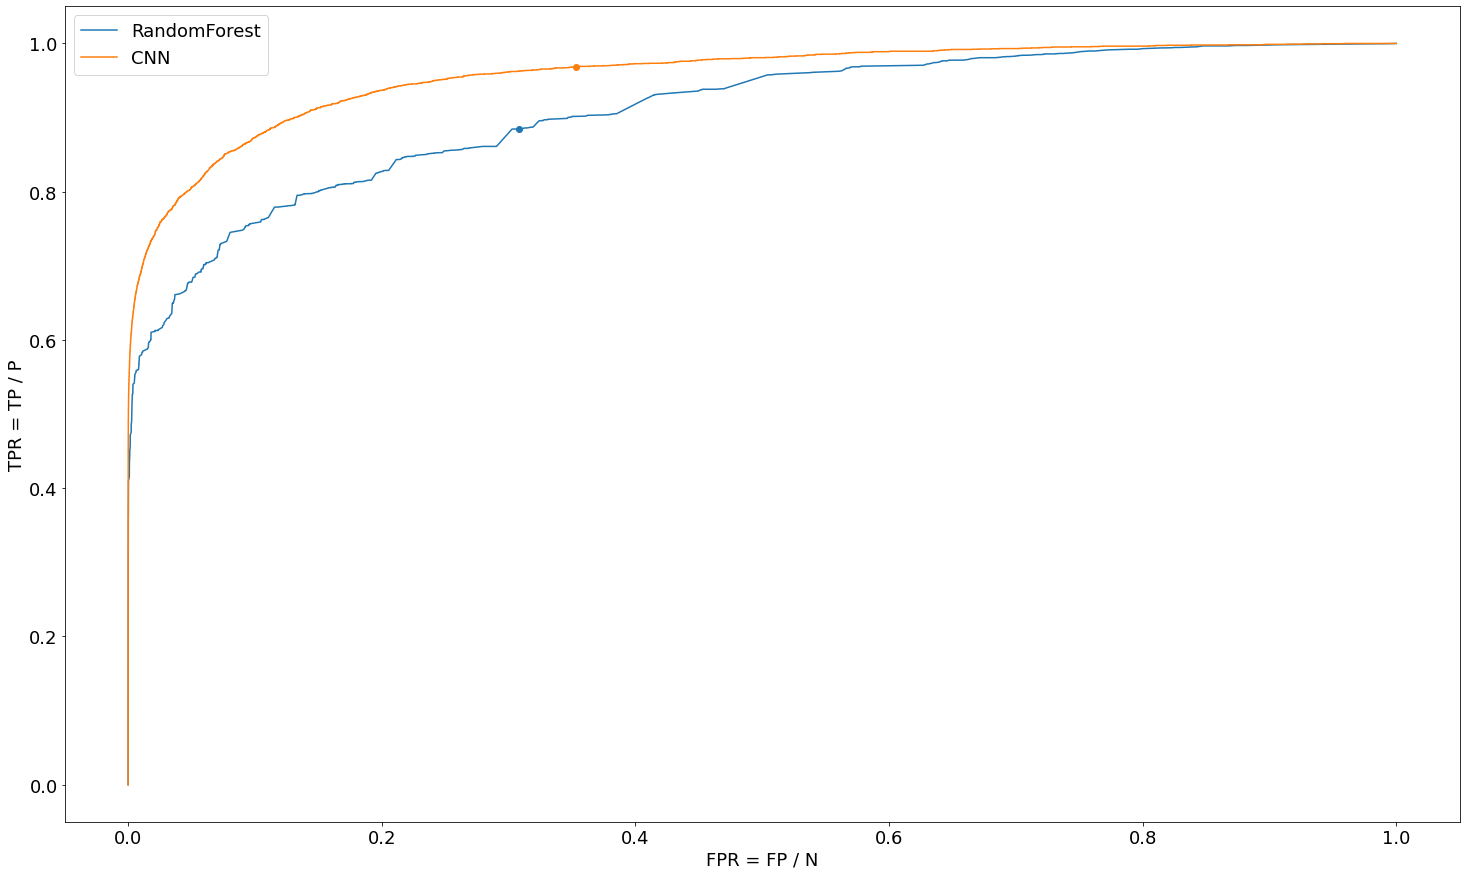

In [121]:
plt.plot(rf_fpr, rf_tpr, label="RandomForest")
plt.plot(cnn_fpr, cnn_tpr, label="CNN")
plt.xlabel("FPR = FP / N")
plt.ylabel("TPR = TP / P")
plt.legend()

id_threshold = np.argmin(np.abs(rf_thresholds - .50))
plt.scatter(rf_fpr[id_threshold], rf_tpr[id_threshold])
id_threshold = np.argmin(np.abs(cnn_thresholds - .50))
plt.scatter(cnn_fpr[id_threshold], cnn_tpr[id_threshold])
plt.show()